In [32]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset


In [61]:
boston = load_boston()
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [67]:
df = np.hstack((boston.data, boston.target.reshape(boston.target.shape[0], 1))) 
colums = np.hstack((boston.feature_names, np.array(["target"])))
df = pd.DataFrame(data=df, columns=colums)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exploratory Data Visualisation

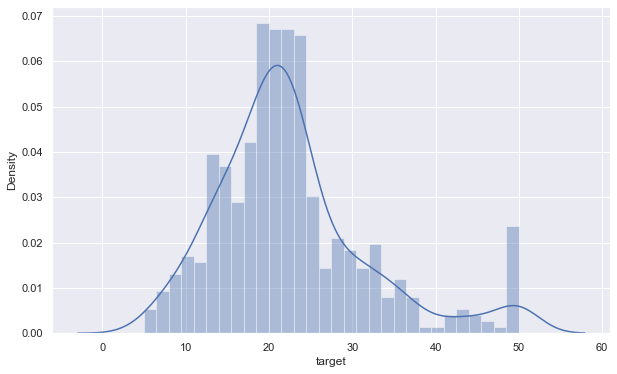

In [69]:
# Take a look at target 
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(df["target"], bins=30)
plt.show()

We can see that thes values of targets are distributed mormaly with a few outliers

<AxesSubplot:>

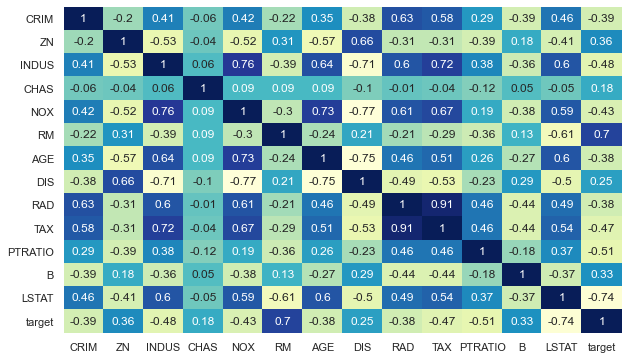

In [70]:
# Correlation matrix that mesures the linear relationships between the variable
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cbar=False, cmap='YlGnBu')

**The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation**

### Observation

* To fit a linear regression model, we select those features which have a hight correlation with our target variable. By looking at the correlation matrix we can see that `RM` and `LSTAT` have a high correlation with `MEDV`

* Then we can sse `RAD` and `TAX` have a correlation of 0.91 => we should not select both these features together for training the model. [Read more](`https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r/1150#1150`). The same for `DIS` and `AGE`

Text(0.5, 1.0, 'Price in function of Average number of rooms per dwelling')

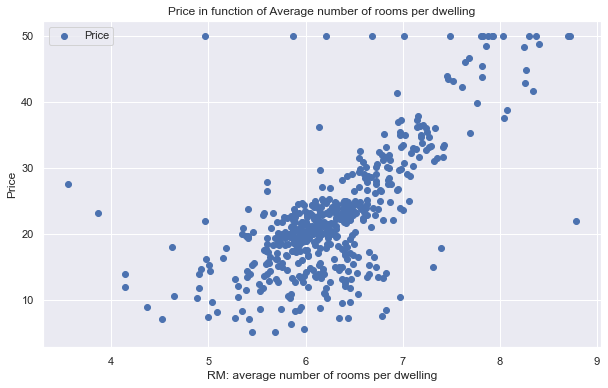

In [81]:
# Target in function of RM
plt.figure(figsize=(10,6))
plt.scatter(df.RM, df.target) 
plt.xlabel("RM: average number of rooms per dwelling")
plt.ylabel("Price")
plt.legend(["Price"])
plt.title("Price in function of Average number of rooms per dwelling")

Text(0.5, 1.0, 'Price in function of Lower status of the population')

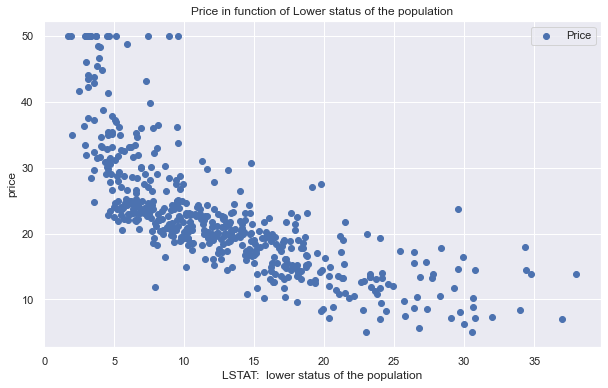

In [80]:
# Target in function of LSTAT
plt.figure(figsize=(10,6))
plt.scatter(df.LSTAT, df.target)
plt.xlabel("LSTAT:  lower status of the population")
plt.ylabel("price")
plt.legend(["Price"])
plt.title("Price in function of Lower status of the population")

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


## Modeling

In [94]:
x_array = np.hstack((np.array(df.RM).reshape(df.RM.size, 1), np.array(df.LSTAT).reshape(df.LSTAT.size, 1)))


In [100]:
# Training, testing dataset

X = pd.DataFrame(data= x_array, columns=['RM', 'LSTAT'])
y = df.target


In [102]:
class trainingModel():
    def __init__(self):
        self.svr = SVR()
        self.rfr = RandomForestRegressor()
        self.ln = LinearRegression()
    def fit(self, X, y):
        self.svr.fit(X,y)
        self.rfr.fit(X,y)
        self.ln.fit(X,y)
    def score(self, X, y):
        svr_score = self.svr.score(X,y)
        rfr_score = self.rfr.score(X,y)
        ln_score = self.ln.score(X,y)
        return (svr_score, rfr_score, ln_score)


In [108]:
models = trainingModel()
models.fit(X,y)
svr_score, rfr_score, ln_score = models.score(X,y)

In [110]:
print(f'SVR score: {svr_score}')
print(f'RFR score: {rfr_score}')
print(f'LN score: {ln_score}')

SVR score: 0.6567331853331126
RFR score: 0.9625637257757677
LN score: 0.6385616062603403


We can see that `RandomForestRegressor` give the hightest score so we can use that model to continue

In [128]:
# Improuve our model
grid_params = {
    "n_estimators": np.arange(10,1000, 50),
    "random_state": [0]
}

grid = GridSearchCV(RandomForestRegressor(), grid_params, cv=5)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960]),
                         'random_state': [0]})

In [135]:
print(grid.best_params_)
model = grid.best_estimator_
model.fit(X,y)
model.score(X,y)

{'n_estimators': 960, 'random_state': 0}


0.9636438463385443

In [134]:
rfr = RandomForestRegressor(n_estimators=960, random_state=0)
rfr.fit(X,y)
score = rfr.score(X,y)
print(score)

0.9636438463385443


In [149]:
def prediction(rm, l_stat):
    X = np.array([rm , l_stat]).reshape(1,2)
    y = rfr.predict(X)
    return y

In [151]:
prediction(6.57, 4.98)

array([25.67229167])